Run the communication game in which input are binary vectors

### Prepare the format to use EGG framework

In [1]:
# from matplotlib.image import imread
# import numpy as np
# import pickle
# import h5py

In [2]:
# concept = []
# path = []
# images = []
# count = 0

# with open('../data/cifar10/cifar10-dataset/val.txt') as f:
#     for line in f:
#         tmp = line.strip().split(' ')
#         concept.append(int(tmp[1]))
#         path.append([f'tensor({str(count)})', './data/cifar10/' + tmp[0]])
#         count += 1
#         images.append(imread('../data/cifar10/cifar10-dataset/' + tmp[0]))
# images = np.array(images)
        
# with open('./data/cifar10/test/ours_images_single_sm0.objects', "wb") as f:
#     pickle.dump(np.array(concept), f, pickle.HIGHEST_PROTOCOL)
    
# with open('./data/cifar10/test/ours_images_paths_sm0.objects', "wb") as f:
#     pickle.dump(np.array(path), f, pickle.HIGHEST_PROTOCOL)
    
# h5f = h5py.File('./data/cifar10/test/ours_images_single_sm0.h5', 'w')
# h5f.create_dataset('cifar10_test', data=images)
# h5f.close()

### Compare bin communication

In [3]:
#! pip install git+https://github.com/facebookresearch/EGG.git

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def plot_result(result_df, mode):
    fig,ax = plt.subplots()
    for col in ['acc','sender_entropy','receiver_entropy']:
        ax.plot(result_df[result_df['mode'] == mode]['epoch'],
                result_df[result_df['mode'] == mode][col],
                label=col)

    ax.set_xlabel("epoch")
    # ax.set_ylabel("weight")
    ax.legend(loc='best')

In [12]:
%%capture cap --no-stderr
! python input_bin/train.py --root=./data/formatted/bin/DeepBit --n_epochs=10

In [13]:
result_df = pd.DataFrame([json.loads(line) for line in cap.stdout.split('\n') if line])

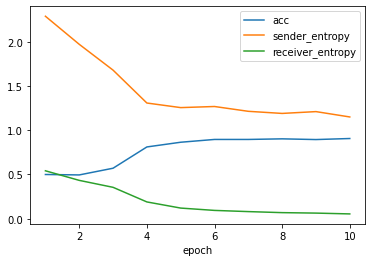

In [14]:
plot_result(result_df, 'train')

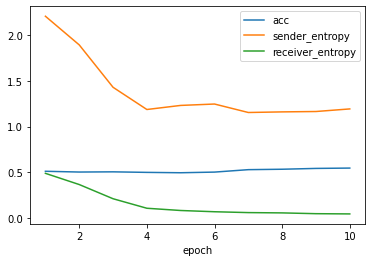

In [15]:
plot_result(result_df, 'test')

In [16]:
%%capture cap --no-stderr
! python input_bin/train.py --root=./data/formatted/bin/GreedyHash --n_epochs=10

In [17]:
result_df = pd.DataFrame([json.loads(line) for line in cap.stdout.split('\n') if line])

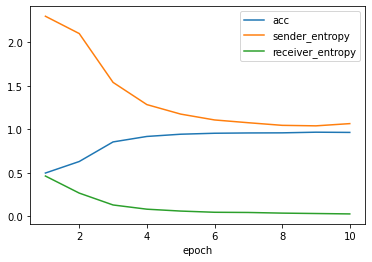

In [18]:
plot_result(result_df, 'train')

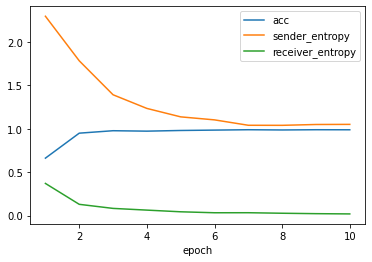

In [19]:
plot_result(result_df, 'test')

In [20]:
%%capture cap --no-stderr
! python input_bin/train.py --root=./data/formatted/bin/BiHalf --n_epochs=10

In [21]:
result_df = pd.DataFrame([json.loads(line) for line in cap.stdout.split('\n') if line])

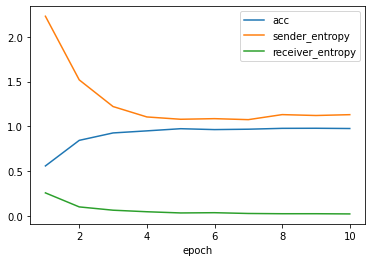

In [22]:
plot_result(result_df, 'train')

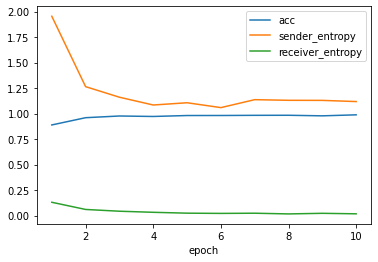

In [23]:
plot_result(result_df, 'test')